In [1]:
# =======================
# STEP 1: Import Libraries
# =======================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import joblib

# =======================
# STEP 2: Load Dataset
# =======================
data = pd.read_csv('cleaned car.csv')

# Drop unnecessary column
data = data.drop('Unnamed: 0', axis=1)

# =======================
# STEP 3: Define Features & Target
# =======================
X = data.drop('Price', axis=1)
y = data['Price']

# =======================
# STEP 4: Preprocessing (Encoding + Scaling)
# =======================
categorical_cols = ['name', 'company', 'fuel_type']
numerical_cols = ['year', 'kms_driven']

# One-Hot Encode categorical columns & scale numeric
ct = ColumnTransformer([
    ('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('scaler', StandardScaler(), numerical_cols)
], remainder='drop')

X_processed = ct.fit_transform(X)

# =======================
# STEP 5: Train-Test Split
# =======================
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# =======================
# STEP 6: Build ANN Model
# =======================
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1) 
])

# =======================
# STEP 7: Compile Model
# =======================
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# =======================
# STEP 8: Train Model
# =======================
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

# =======================
# STEP 9: Evaluate Model
# =======================
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {loss:.2f}")
print(f"Test MAE: {mae:.2f}")

# =======================
# STEP 10: Save Model and Preprocessor
# =======================
model.save('car_price_ann_model12.h5')
joblib.dump(ct, 'car_preprocessor12.pkl')
print("Model and Preprocessor saved successfully!")

# =======================
# STEP 11: Optional Test Prediction
# =======================
sample = pd.DataFrame({
    'name': ['Hyundai i10'],
    'company': ['Hyundai'],
    'year': [2015],
    'kms_driven': [35000],
    'fuel_type': ['Petrol']
})

sample_transformed = ct.transform(sample)
predicted_price = model.predict(sample_transformed)
print(f"Predicted Price: ₹{predicted_price[0][0]:.2f}")


Epoch 1/100


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 303543943168.0000 - mae: 403076.7500 - val_loss: 196823941120.0000 - val_mae: 336985.4375
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 303542829056.0000 - mae: 403075.2500 - val_loss: 196822302720.0000 - val_mae: 336982.9688
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 303539257344.0000 - mae: 403070.7188 - val_loss: 196816732160.0000 - val_mae: 336974.7812
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 303528083456.0000 - mae: 403056.7500 - val_loss: 196800053248.0000 - val_mae: 336950.8125
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 303496036352.0000 - mae: 403018.3438 - val_loss: 196757291008.0000 - val_mae: 336890.4688
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 303425028096.0000 - mae: 402930.6250 - val_loss: 196664393728.0000 - val_mae: 336761.4062
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 303275933696.0000 - mae: 402755.6875 - val_loss: 196

Test Loss (MSE): 127914008576.00
Test MAE: 189372.59
✅ Model and Preprocessor saved successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Predicted Price: ₹419464.72


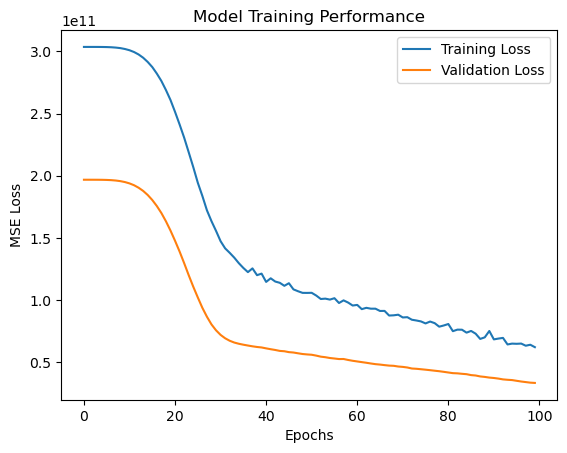

In [2]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()
